DATA ANALYTICS FINAL PROJECT CODE

Instructions
1. Upload the updated_movie_metadata-2.csv file
2. Run first and second cells (Initialization and imports section) initially atlease once
3. You can run the cells sequentially or use the table of content to skip to one of the models

# INITIALIZATIONS AND IMPORTS

In [0]:
import pandas as pd
import numpy as np
import math
import ast
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score 


In [0]:
def readData(): 
    navalues = {'adult':False, 'belongs_to_collection':'', 'budget':0, 'genres':'[]', 'homepage':'', 'id':-1,
        'imdb_id':'', 'original_language':'', 'original_title':'', 'overview':'',
        'popularity':-1, 'poster_path':'', 'production_companies':'[]',
        'production_countries':'[]', 'release_date':'', 'revenue':0, 'runtime':-1,
        'spoken_languages':'[]', 'status':'', 'tagline':'', 'title':'', 'video':False,
        'vote_average':-1, 'vote_count':-1}

    data =  pd.read_csv("./updated_movie_metadata-2.csv",
                        dtype = {'budget':np.float, 'belongs_to_collection':str,'sequel':int, 'id':'Int64', 'homepage':str, 
                                    'imdb_id':str, 'original_language':str, 'original_title':str, 'adult':int,
                                    'overview':str, 'popularity':np.float, 'poster_path':str,'revenue':np.float, 
                                    'runtime':'Int64','tagline':str, 'title':str, 'vote_average':np.float, 
                                    'vote_count':'Int64','Music':int, 'Romance':int, 'Science_Fiction':int, 'Horror':int, 
                                'War':int, 'History':int, 'Animation':int, 'TV_Movie':int, 'Action':int, 'Mystery':int, 
                                'Adventure':int, 'Western':int, 'Documentary':int, 'Foreign':int, 'Comedy':int, 'Drama':int, 
                                'Fantasy':int, 'Family':int, 'Crime':int, 'Thriller':int},
                        na_values=np.nan)
    return data

def categorizeRevenue(data):

    data["profit"] = "profit"

    for index,row in data.iterrows():
        if row.revenue <= 9631905.25:
            data.loc[index,"profit"] = "low-profit"
        elif  row.revenue > 99347600.25:
            data.loc[index,"profit"] = "high-profit"
    return data


data = readData()
backupdata = data

# LINEAR REGRESSION CODE



---



---


Linear Regression


---



---




In [0]:
data = readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)
data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
linregData = data[['adult','sequel','budget','vote_average','popularity', 'vote_count','vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign','revenue']].copy()

x = linregData.values #returns a numpy array
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
linregData = pd.DataFrame(x_scaled)
linregData.columns = ['adult','sequel','budget','vote_average','popularity', 'vote_count', 'vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign','revenue']

linregData.head()

,adult,sequel,budget,vote_average,popularity,vote_count,vote_total,runtime,video,Documentary,Mystery,Fantasy,Horror,Thriller,Animation,Western,War,Family,Action,Adventure,TV_Movie,Music,Romance,Crime,Drama,History,Science_Fiction,Comedy,Foreign,revenue
0,0.0,1.0,0.078947,0.885057,0.040086,0.384725,0.365726,0.318898,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133677
1,0.0,0.0,0.171053,0.793103,0.031079,0.171439,0.146040,0.409449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093936
2,0.0,0.0,0.042105,0.701149,0.007049,0.002416,0.001819,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.028867
3,0.0,1.0,0.039474,0.655172,0.015319,0.012291,0.008649,0.417323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.027119
4,0.0,0.0,0.157895,0.885057,0.032740,0.133996,0.127379,0.669291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.066896


In [0]:
feature_cols = ['adult','sequel','budget','vote_average','popularity', 'vote_count', 'vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']
linregData['revenue'] = data.revenue.astype(float)

X_train, X_test, y_train, y_test = train_test_split(linregData[feature_cols],data.revenue, test_size=0.2, random_state=42)
X = linregData[feature_cols]
y = data.revenue
# create a fitted model with all three features
linearModel1 = smf.ols(formula="revenue ~ adult + sequel + budget + vote_average + popularity + vote_count + vote_total + video + Science_Fiction + TV_Movie + Documentary + Mystery + Fantasy + Horror + Thriller + Animation + Western + War + Family + Action + Adventure + Music + Romance + Crime + Drama + History + Comedy + Foreign", data=linregData).fit()
linearModel1.params

# instantiate and fit
linearModel2 = LinearRegression(normalize=True)
linearModel2.fit(X_train, y_train)
y_pred = linearModel2.predict(X_test)
print("Linear Model-1 R-Square = ",linearModel1.rsquared)
print("Linear Model-2 R-Square = ",r2_score(y_test,y_pred))
linearModel1.summary()

Linear Model-1 R-Square =  0.7452270774523764
Linear Model-2 R-Square =  0.7185064586830532


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     597.3
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        08:08:25   Log-Likelihood:            -1.0492e+05
No. Observations:                5336   AIC:                         2.099e+05
Df Residuals:                    5309   BIC:                         2.101e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.761e+07   1.07e+07     -5.398      0.000   -7.85e+07   -3.67e+07
adult            7.041e-06   5.63e-07     12.499      0.000    5.94e-06    8.15e-06
sequel           4.759e+07    3.1e+06     15.367      0.000    4.15e+07    5.37e+07
budget           6.087e+08   1.67e+07     36.512      0.000    5.76e+08    6.41e+08
vote_average     3.514e+07   1.41e+07      2.494      0.013    7.52e+06    6.28e+07
popularity       5.043e+08   5.19e+07      9.711      0.000    4.02e+08    6.06e+08
vote_count         1.8e+09   1.42e+08     12.638      0.000    1.52e+09    2.08e+09
vote_total      -9.938e+08   1.52e+08     -6.519      0.000   -1.29e+09   -6.95e+08
video            1.796e-07   1.15e-07      1.555      0.120   -4.68e-08    4.06e-07
Science_Fiction -2.862e+07   3.96e+06     -7.237      0.000   -3.64e+07   -2.09e+07
TV_Movie         7.487e+07   8.41e+07      0.890      0.374   -9.01e+07     2.4e+08
Documentary      9.913e+06   1.03e+07      0.964      0.335   -1.02e+07    3.01e+07
Mystery         -2.841e+06   4.46e+06     -0.637      0.524   -1.16e+07     5.9e+06
Fantasy          -9.81e+05   4.25e+06     -0.231      0.817   -9.31e+06    7.35e+06
Horror          -3.301e+06   4.44e+06     -0.744      0.457    -1.2e+07    5.39e+06
Thriller        -2.576e+06   3.21e+06     -0.802      0.423   -8.87e+06    3.72e+06
Animation        1.722e+07   6.34e+06      2.717      0.007     4.8e+06    2.96e+07
Western         -1.321e+07   8.89e+06     -1.486      0.137   -3.06e+07    4.21e+06
War             -5.358e+06   6.97e+06     -0.768      0.442    -1.9e+07    8.31e+06
Family           1.671e+07   4.78e+06      3.498      0.000    7.35e+06    2.61e+07
Action           -9.77e+06    3.3e+06     -2.962      0.003   -1.62e+07    -3.3e+06
Adventure        1.158e+07   3.57e+06      3.240      0.001    4.58e+06    1.86e+07
Music            8.077e+06   6.03e+06      1.340      0.180   -3.74e+06    1.99e+07
Romance          1.735e+07   3.21e+06      5.412      0.000    1.11e+07    2.36e+07
Crime           -9.345e+06   3.52e+06     -2.651      0.008   -1.63e+07   -2.44e+06
Drama           -4.734e+04   2.95e+06     -0.016      0.987   -5.83e+06    5.73e+06
History         -3.124e+06   6.46e+06     -0.483      0.629   -1.58e+07    9.55e+06
Comedy           4.778e+06   2.96e+06      1.616      0.106   -1.02e+06    1.06e+07
Foreign         -1.036e+06   2.81e+07     -0.037      0.971   -5.61e+07    5.41e+07
==============================================================================
Omnibus:                     4148.805   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           357328.047
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      42.613   Cond. No.                     1.36e+16


# RANDOM FOREST REGRESSOR CODE



---



---
Random Forest


---



---




In [0]:
import pandas as pd
import numpy as np

data =  readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)

data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
print(data.iloc[0])

adult                                                                    0
belongs_to_collection                                 Toy Story Collection
sequel                                                                   1
budget                                                               3e+07
genres                                   ['Animation', 'Comedy', 'Family']
homepage                              http://toystory.disney.com/toy-story
id                                                                     862
imdb_id                                                          tt0114709
original_language                                                       en
original_title                                                   Toy Story
overview                 Led by Woody, Andy's toys live happily in his ...
popularity                                                         21.9469
poster_path                               /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
production_companies     

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ['adult','sequel','budget','popularity','vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']


model = RandomForestRegressor(n_estimators=200, max_features=len(feature_cols), oob_score=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(data[feature_cols], data["revenue"], test_size=0.20, random_state=25)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [0]:
from sklearn.metrics import r2_score
print(model.score(Xtest,ytest))
print("Random Forest Regression R-Square Value = ",r2_score(ytest,ypred))

0.8164839192296386
Random Forest Regression R-Square Value =  0.8164839192296386


In [0]:
# compute the out-of-bag classification accuracy
model.oob_score_

0.7623169930279233

In [0]:
pd.DataFrame({'feature':feature_cols, 'importance':model.feature_importances_})

,feature,importance
0,adult,0.000000e+00
1,sequel,1.821990e-02
2,budget,3.340029e-01
3,popularity,6.786840e-02
4,vote_total,4.722042e-01
5,runtime,4.048846e-02
6,video,0.000000e+00
7,Documentary,5.667401e-05
8,Mystery,1.820843e-03
9,Fantasy,5.661089e-03


# NEURAL NETWORK REGRESSION CODE



---



---
Neural Network Regression


---



---




In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval

data = readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)
data['release_date'] = pd.to_datetime(data['release_date'],format='%m/%d/%Y')

In [0]:
feature_cols = ['adult','sequel','budget','vote_average','popularity', 'vote_count', 'vote_total',
                # 'production_companies', 'production_countries','release_date', 'spoken_languages',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']

X_train_full, X_test, y_train_full, y_test = train_test_split(data[feature_cols], data.revenue, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_random_seed(5)

In [0]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Sometimes the neural network might stop after only two epochs, if this happens kindly re-execute the cell to get the proper output

Train on 3414 samples, validate on 854 samples
Epoch 1/100
3414/3414 [==============================] - 8s 2ms/step - loss: 36579259411584208.0000 - coeff_determination: -0.4733 - val_loss: 33747878707537040.0000 - val_coeff_determination: -0.4343
Epoch 2/100
3414/3414 [==============================] - 0s 106us/step - loss: 36579127198551696.0000 - coeff_determination: -0.4615 - val_loss: 33747325052808176.0000 - val_coeff_determination: -0.4342
Epoch 3/100
3414/3414 [==============================] - 0s 112us/step - loss: 36574006392327280.0000 - coeff_determination: -0.4625 - val_loss: 33731345292539228.0000 - val_coeff_determination: -0.4333
Epoch 4/100
3414/3414 [==============================] - 0s 106us/step - loss: 36500999740629032.0000 - coeff_determination: -0.4362 - val_loss: 33563456967252804.0000 - val_coeff_determination: -0.4232
Epoch 5/100
3414/3414 [==============================] - 0s 106us/step - loss: 36069279788010472.0000 - coeff_determination: -0.4371 - val_loss

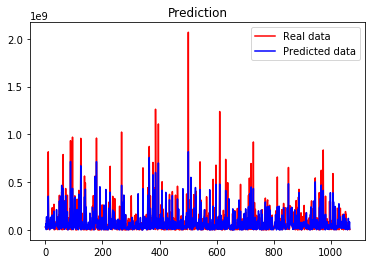

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = Sequential()
model.add(Dense(25, input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(20))
model.add(Activation("relu"))
model.add(Dropout(0.15))
model.add(Dense(15))
model.add(Activation("relu"))
model.add(Dropout(0.15))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dropout(0.15))
model.add(Dense(8))
model.add(Activation("relu"))
model.add(Dropout(0.15))
model.add(Dense(3))
model.add(Activation("relu"))
model.add(Dropout(0.15))
model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test
y_pred = model.predict(X_new)
print(mse_test)
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred.flatten(), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [0]:
print("Neural Network R-Square = ",r2_score(y_test.values,y_pred.flatten()))

Neural Network R-Square =  0.6731840960929492


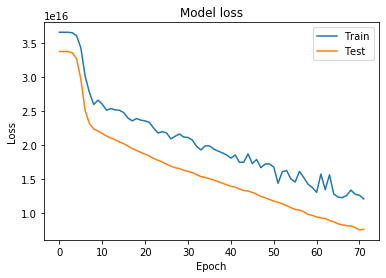

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

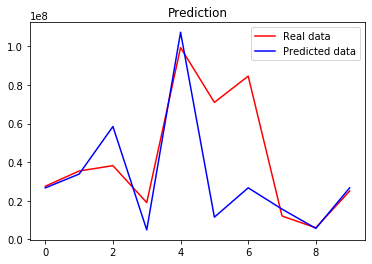

In [0]:
plt.plot(y_test.values[:10], color = 'red', label = 'Real data')
plt.plot(y_pred.flatten()[:10], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# NLP - SUPPORT VECTOR CLASSIFIER CODE



---



---
NLP - Support Vector Classifier


---



---




In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
import spacy

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

# Use the punctuations of string module
import string
punctuations = string.punctuation

# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()
# Build a list of stopwords to use to filter
stopwords = list(STOP_WORDS)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import eli5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
data = readData()
data.genres = data.genres.apply(ast.literal_eval)
genrelist = list(set(x for i in data.genres for x in i))
genrelist[genrelist.index('TV Movie')] = 'TV_Movie'
genrelist[genrelist.index('Science Fiction')] = 'Science_Fiction'
data = categorizeRevenue(data)
data.profit = data.profit.map({"low-profit":0,"profit":1,"high-profit":2})

In [0]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [0]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(str(text)) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [0]:
# Basic function to clean the text 
def clean_text(text):
    return text.strip().lower()

In [0]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 

classifier = SVC(C=150, gamma=2e-2, probability=True)

In [0]:
# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [0]:
# Features and Labels
feature_cols = ['adult','sequel','budget','popularity','vote_total',
                # 'production_companies', 'production_countries','release_date', 'spoken_languages',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']
X = data['overview']
ylabels = data['profit']
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

In [0]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [0]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7fedffa9dda0>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7fee66328a60>,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=150, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [0]:
X_test.shape

(1068,)

In [0]:
X_test.values[1]

'A young man is plunged into a life of subterfuge, deceit and mistaken identity in pursuit of a femme fatale whose heart is never quite within his grasp'

In [0]:
# Predicting with a test dataset
sample_prediction = pipe.predict(X_test)

In [0]:
sample_prediction[1:10]
# rev_dic = {0:"low-profit",1:"profit",2:"high-profit"}
# np.vectorize(dic.get)(sample_prediction[1:10])

array([1, 1, 1, 1, 2, 2, 1, 1, 1])

In [0]:
y_test.values[1:10]

array([1, 1, 1, 2, 1, 1, 1, 0, 1])

In [0]:
print("Accuracy Score:",pipe.score(X_test, y_test))

Accuracy Score: 0.44756554307116103


# LOGISTIC REGRESSION CODE



---



---

Logistic Regression


---



---



In [0]:
data = readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)
data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
mean = data.revenue.mean()

In [0]:
data = categorizeRevenue(data)

In [0]:
feature_cols = ['adult','sequel','budget','popularity','vote_total',
                # 'production_companies', 'production_countries','release_date', 'spoken_languages',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']
data['profit'] = data.profit.map({'low-profit':0, 'profit':1, 'high-profit':2})             
X = data[feature_cols]
y = data.profit

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg', max_iter=500) # Instatiate estimator
logreg.fit(X_train, y_train) # Fit data

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)

In [0]:
# Calculate accuracy of model
print("Logistic Regression Accuaracy : ",metrics.accuracy_score(y_test, y_pred) )

Logistic Regression Accuaracy :  0.7106446776611695


# RANDOM FOREST CLASSIFIER CODE



---



---


Random Forest Classifier Classes

---



---



In [0]:
import pandas as pd
import numpy as np

data =  readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)

data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
data = categorizeRevenue(data)
data.profit = data.profit.map({"low-profit":0,"profit":1,"high-profit":2})
print(data.iloc[0])

adult                                                                    0
belongs_to_collection                                 Toy Story Collection
sequel                                                                   1
budget                                                               3e+07
genres                                   ['Animation', 'Comedy', 'Family']
homepage                              http://toystory.disney.com/toy-story
id                                                                     862
imdb_id                                                          tt0114709
original_language                                                       en
original_title                                                   Toy Story
overview                 Led by Woody, Andy's toys live happily in his ...
popularity                                                         21.9469
poster_path                               /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
production_companies     

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ['adult','sequel','budget','popularity','vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']


model = RandomForestClassifier(n_estimators=200, max_features=len(feature_cols), oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data["profit"], test_size=0.20, random_state=5)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score,accuracy_score
# print(model.score(Xtest,ytest))
# print(r2_score(ytest,ypred))
print("Random Forest Classifier Accuracy : ",accuracy_score(y_test,ypred))

Random Forest Classifier Accuracy :  0.700374531835206


In [0]:
# compute the out-of-bag classification accuracy
model.oob_score_

0.6834582942830365

In [0]:
pd.DataFrame({'feature':feature_cols, 'importance':model.feature_importances_})

,feature,importance
0,adult,0.000000
1,sequel,0.022820
2,budget,0.204137
3,popularity,0.134854
4,vote_total,0.355554
5,runtime,0.116419
6,video,0.000000
7,Documentary,0.002042
8,Mystery,0.008505
9,Fantasy,0.007111


# ENSEMBLE MODEL CODE



---



---
Ensemble Model


---


---





In [0]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
data =  readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)
data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
data = categorizeRevenue(data)
data.profit = data.profit.map({"low-profit":0,"profit":1,"high-profit":2})

In [0]:
all_feature_cols = ['adult','sequel','budget','popularity','vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign','profit','overview']
feature_cols = ['adult','sequel','budget','popularity','vote_total',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign','overview']
dataX = data[all_feature_cols]
X_train, X_test, y_train, y_test = train_test_split(dataX[feature_cols], dataX["profit"], test_size=0.20, random_state=42)
print(X_train.loc[0:10,X_train.columns!='overview'])

      adult  sequel       budget  ...  Science_Fiction  Comedy  Foreign
0         0       1   30000000.0  ...                0       1        0
2174      0       0   15000000.0  ...                0       1        0
1356      0       0   18000000.0  ...                0       1        0
3886      0       1  200000000.0  ...                0       1        0
4998      0       0    6000000.0  ...                0       1        0
...     ...     ...          ...  ...              ...     ...      ...
1389      0       0   15000000.0  ...                1       1        0
3564      0       0   45000000.0  ...                0       0        0
884       0       0    2000000.0  ...                0       1        0
1868      0       0   75000000.0  ...                0       1        0
10        0       0   98000000.0  ...                0       0        0

[1877 rows x 27 columns]


In [0]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(str(text)) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [0]:
# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [0]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
# classifier = LinearSVC()
classifier = SVC(C=150, gamma=2e-2, probability=True)

In [0]:
# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

def fit_multiple_estimators(classifiers, X_list, y, sample_weights = None):

    # Convert the labels `y` using LabelEncoder, because the predict method is using index-based pointers
    # which will be converted back to original data later.
    le_ = LabelEncoder()
    le_.fit(y)
    transformed_y = le_.transform(y)

    # Fit all estimators with their respective feature arrays
    estimators_ = [clf.fit(X, y) if sample_weights is None else clf.fit(X, y, sample_weights) for clf, X in zip([clf for _, clf in classifiers], X_list)]

    return estimators_, le_


def predict_from_multiple_estimator(estimators, label_encoder, X_list, weights = None):

    # Predict 'soft' voting with probabilities

    pred1 = np.asarray([clf.predict_proba(X) for clf, X in zip(estimators, X_list)])
    pred2 = np.average(pred1, axis=0, weights=weights)
    pred = np.argmax(pred2, axis=1)

    # Convert integer predictions to original labels:
    return label_encoder.inverse_transform(pred)

In [0]:
X_train1, X_train2 = X_train.loc[:,X_train.columns!='overview'], X_train.loc[:,'overview']
X_test1, X_test2 = X_test.loc[:,X_test.columns!='overview'], X_test.loc[:,'overview']

X_train_list = [X_train1, X_train2, X_train1]
X_test_list = [X_test1, X_test2, X_test1]

In [0]:
model = RandomForestClassifier(n_estimators=200, max_features=5, oob_score=True)
logreg = LogisticRegression(solver='newton-cg', max_iter=500)
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

classifiers = [('lr',logreg),('nlp',pipe),('rf',model)]

In [0]:
fitted_estimators, label_encoder = fit_multiple_estimators(classifiers, X_train_list, y_train)


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [0]:
y_pred = predict_from_multiple_estimator(fitted_estimators, label_encoder, X_test_list)


In [0]:
from sklearn.metrics import accuracy_score
print("Ensemble Model Accuracy : ",accuracy_score(y_test, y_pred))

Ensemble Model Accuracy :  0.6966292134831461


# NEURAL NETWORK CLASSIFIER CODE



---



---
Neural Network Classifier


---



---




In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval

data = readData()
data.adult = data.adult.astype(int)
data.video = data.video.astype(int)
data['release_date'] = pd.to_datetime(data['release_date'],format='%m/%d/%Y')
data=categorizeRevenue(data)
data.profit = data.profit.map({'low-profit':0,'profit':1,'high-profit':2})

In [0]:
feature_cols = ['adult','sequel','budget','popularity', 'vote_total',
                # 'production_companies', 'production_countries','release_date', 'spoken_languages',
                'runtime','video','Documentary', 'Mystery', 'Fantasy',
               'Horror', 'Thriller', 'Animation', 'Western', 'War', 
                'Family', 'Action','Adventure', 'TV_Movie', 'Music', 
                'Romance', 'Crime', 'Drama','History', 'Science_Fiction',
                'Comedy', 'Foreign']

X_train_full, X_test, y_train_full, y_test = train_test_split(data[feature_cols], data['profit'], test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.values)
X_valid = scaler.transform(X_valid.values)
X_test = scaler.transform(X_test.values)
# print(y_train_full.columns)
# y_train = y_train.values
y_train_onehot = pd.get_dummies(y_train).values
y_valid_onehot = pd.get_dummies(y_valid).values
y_test_onehot = pd.get_dummies(y_test).values

In [0]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
np.random.seed(42)
tf.random.set_random_seed(1)
# start = time()
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = Sequential()
model.add(Dense(input_dim=27,output_dim=54))
# model.add(Activation("softmax"))
model.add(Dropout(0.2))
model.add(Dense(output_dim=27))
# model.add(Activation("softmax"))
model.add(Dropout(0.2))
model.add(Dense(output_dim=3))
model.add(Activation("softmax"))
# model.add(Dropout(0.2))
# model.add(Dense(8))
# model.add(Activation("softmax"))
# model.add(Dropout(0.2))
# model.add(Dense(5))
# model.add(Activation("softmax"))
# model.add(Dropout(0.15))
# model.add(Dense(3))
# model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_onehot, epochs=200, validation_data=(X_valid, y_valid_onehot), callbacks=[es])
mse_test = model.evaluate(X_test, y_test_onehot)
X_new = X_test
y_pred = model.predict(X_new)
print(mse_test)
y_prediction = model.predict_classes(X_test)

# plt.plot(y_test.values, color = 'red', label = 'Real data')
# plt.plot(y_pred.flatten(), color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=27, units=54)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=27)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  app.launch_new_instance()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3414 samples, validate on 854 samples
Epoch 1/200
3414/3414 [==============================] - 8s 2ms/step - loss: 1.0246 - acc: 0.4924 - val_loss: 0.9370 - val_acc: 0.5574
Epoch 2/200
3414/3414 [==============================] - 0s 105us/step - loss: 0.9191 - acc: 0.5501 - val_loss: 0.8777 - val_acc: 0.5831
Epoch 3/200
3414/3414 [==============================] - 0s 100us/step - loss: 0.8515 - acc: 0.5926 - val_loss: 0.8135 - val_acc: 0.6230
Epoch 4/200
3414/3414 [==============================] - 0s 98us/step - loss: 0.8063 - acc: 0.6104 - val_loss: 0.7696 - val_acc: 0.6241
Epoch 5/200
3414/3414 [==============================] - 0s 104us/step - loss: 0.7711 - acc: 0.6239 - val_loss: 0.7437 - val_acc: 0.6475
Epoch 6/200
3414/3414 [==============================] - 0s 107us/step - loss: 0.7462 - acc: 0.6432 - val_loss: 0.7271 - val_acc: 0.6311
Epoch 7/200
3414/3414 [=================

In [0]:
print("Neural Network Classifier Accuracy : ", np.sum(y_prediction == y_test) / float(len(y_test)))

Neural Network Classifier Accuracy :  0.6853932584269663


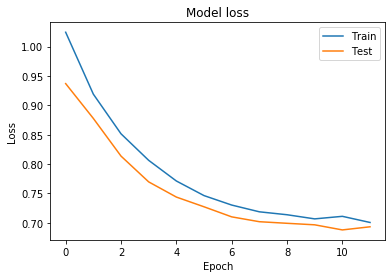

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()